# Inferential Statistics

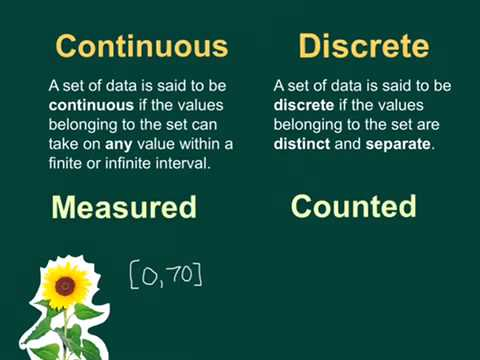

In [131]:
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

In [132]:
import seaborn as sns # Visualisasi data
sns.set(color_codes=True)

## Uniform Distribution

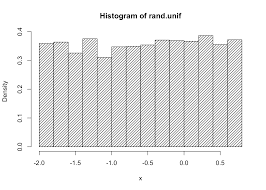

In [133]:
from scipy.stats import uniform

In [134]:
uniform.rvs(size=10000,loc=10,scale=10)

array([11.60284953, 14.40745436, 12.92807875, ..., 14.59720089,
       10.64064588, 16.17906474])

In [135]:
data_uniform = uniform.rvs(size=10000,loc=10,scale=10)

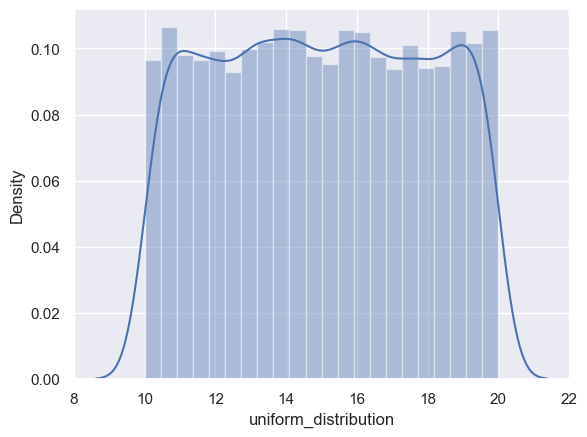

In [136]:
sns.distplot(data_uniform)
plt.xlabel('uniform_distribution')
plt.show()

## Normal Distribution

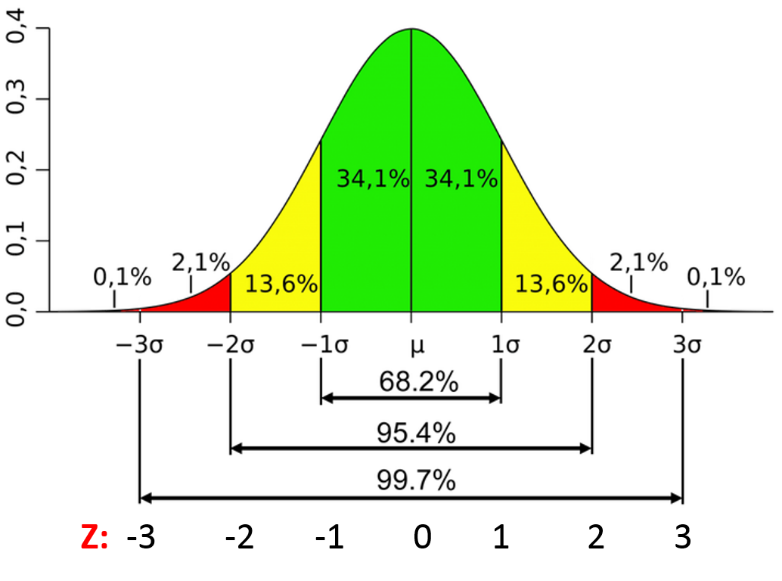

μ = Rata-rata

σ = standar deviasi

<AxesSubplot:ylabel='Density'>

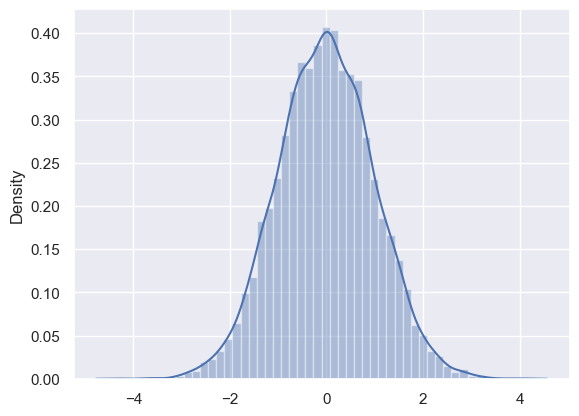

In [137]:
from scipy.stats import norm

data_normal = norm.rvs(size=10000,loc=0,scale=1)

sns.distplot(data_normal)

## Gamma Distribution

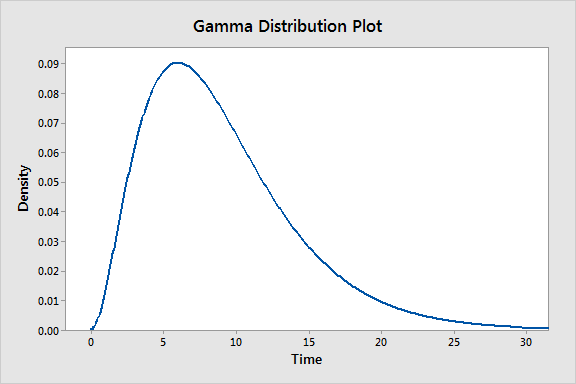

<AxesSubplot:ylabel='Density'>

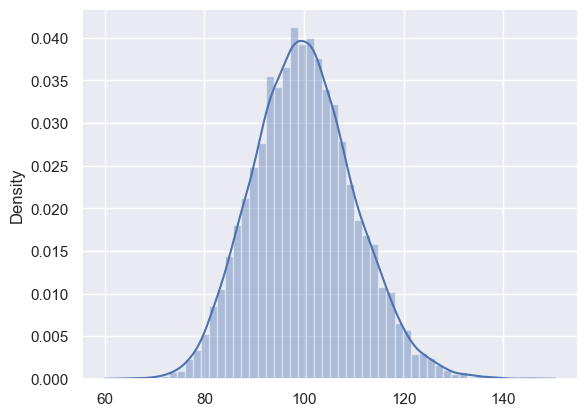

In [138]:
from scipy.stats import gamma
data_gamma = gamma.rvs(size=10000,a=100)
sns.distplot(data_gamma)

## Exponential Distribution

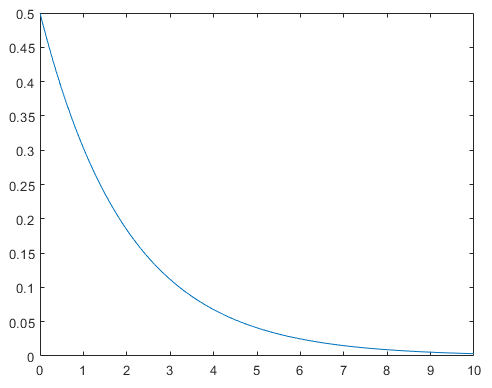

<AxesSubplot:ylabel='Density'>

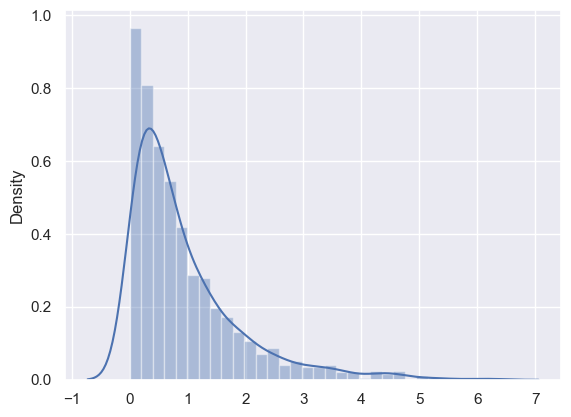

In [139]:
from scipy.stats import expon
data_expon = expon.rvs(scale=1,loc=0,size=1000)
sns.distplot(data_expon)

## Poisson Distribution (Discrete/Count Data)

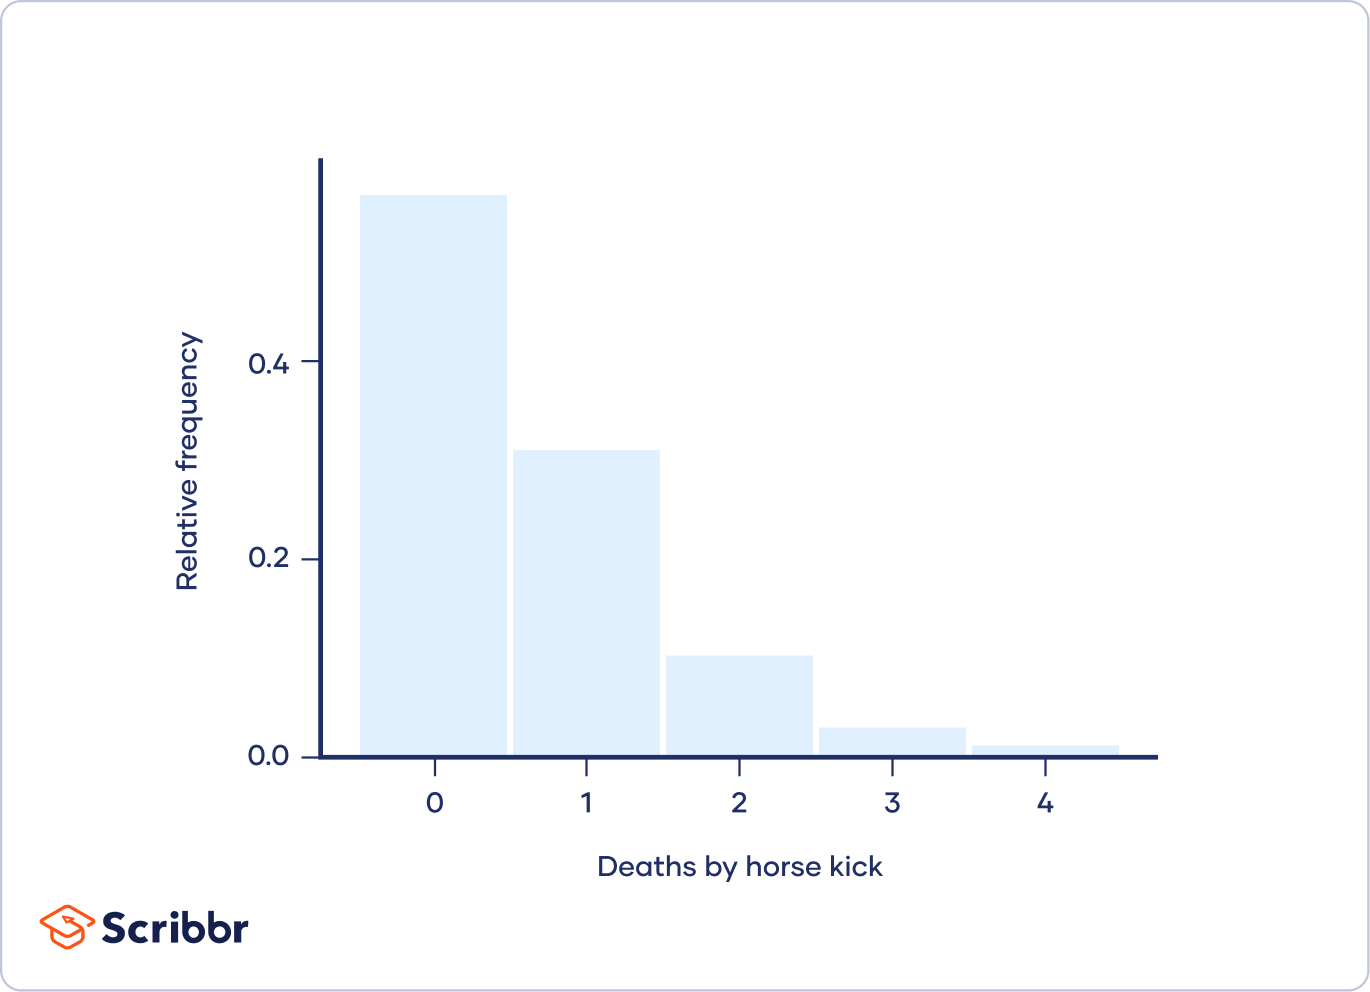

Text(0.5, 0, 'Poisson Distribution (Count Data)')

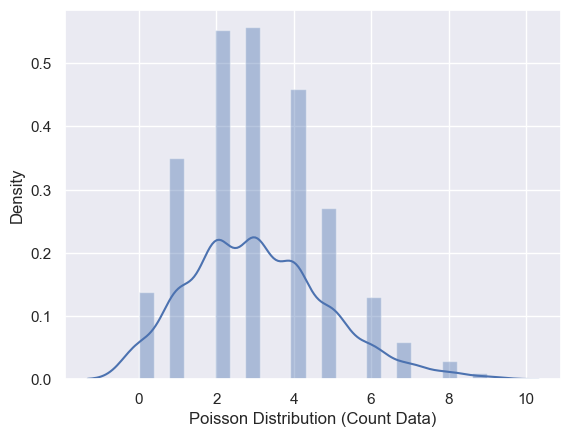

In [140]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3,size=1000)
sns.distplot(data_poisson)
plt.xlabel('Poisson Distribution (Count Data)')

## Binomial Distribution (Discrete)

<AxesSubplot:ylabel='Density'>

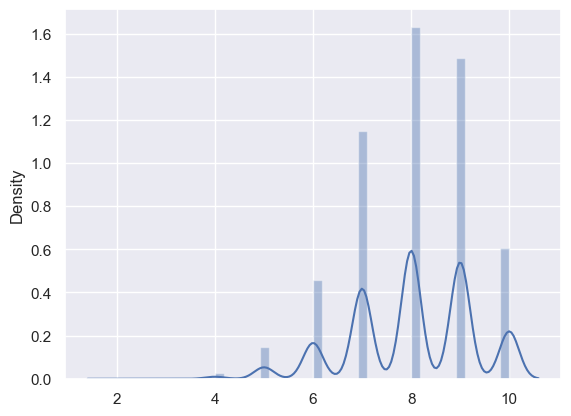

In [141]:
from scipy.stats import binom
data_binom = binom.rvs(n=10,p=0.8,size=10000)
sns.distplot(data_binom)

## Bernoulli Distribution (Discrete)

<AxesSubplot:ylabel='Density'>

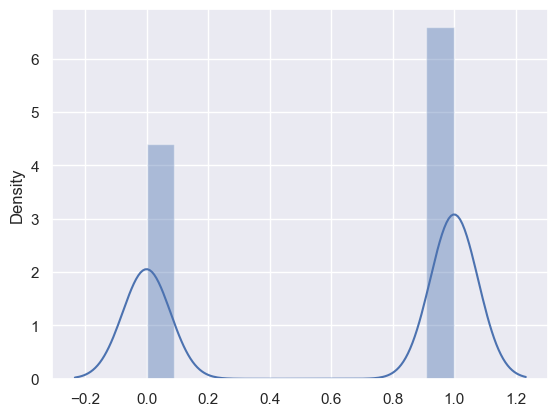

In [142]:
from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10000,p=0.6)
sns.distplot(data_bern)

## Confidence Interval

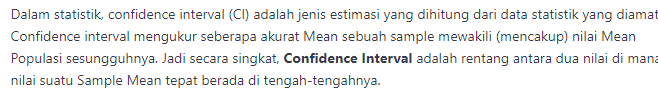

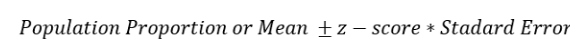

Contoh 160 +- 5

Batas bawah 155

batas atas 165

Confidence Interval 95% maka Z-score 1.96

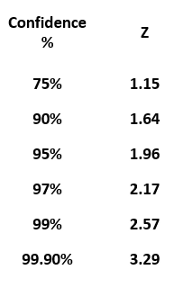

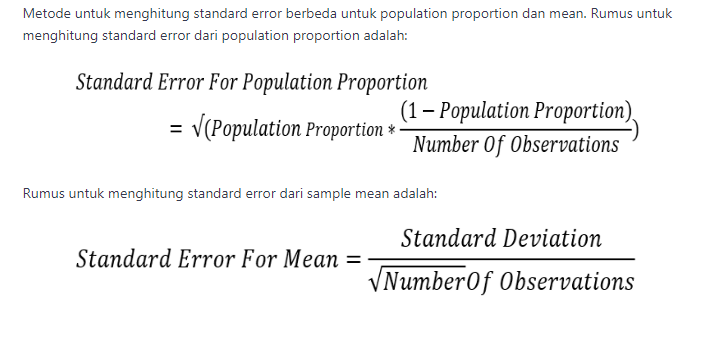

### Confidence Interval for the Population Proportion

In [143]:
import pandas as pd
import numpy as np

df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Sex 1 itu Pria dan 0 itu wanita

Target 1 itu sakit jantung, 0 itu bukan penderita sakit jantung

In [144]:
def sex_label(x):
    if x==1:
        return 'Male'
    else:
        return 'Female'

In [145]:
df['sex_label'] = df['sex'].apply(sex_label)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,sex_label
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,Male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,Male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,Male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,Male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,Female


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   int64  
 1   sex        1025 non-null   int64  
 2   cp         1025 non-null   int64  
 3   trestbps   1025 non-null   int64  
 4   chol       1025 non-null   int64  
 5   fbs        1025 non-null   int64  
 6   restecg    1025 non-null   int64  
 7   thalach    1025 non-null   int64  
 8   exang      1025 non-null   int64  
 9   oldpeak    1025 non-null   float64
 10  slope      1025 non-null   int64  
 11  ca         1025 non-null   int64  
 12  thal       1025 non-null   int64  
 13  target     1025 non-null   int64  
 14  sex_label  1025 non-null   object 
dtypes: float64(1), int64(13), object(1)
memory usage: 120.2+ KB


In [147]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
sex_label    0
dtype: int64

In [148]:
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [149]:
df.groupby(['sex_label','target'])[['target']].count()

target
sex_label target        
Female    0           86
          1          226
Male      0          413
          1          300

In [150]:
n = 86+226
pro_fm = 86/n
print(n,pro_fm)

312 0.27564102564102566


In [151]:
stderror_fm = (pro_fm*(1-pro_fm)/n)**(1/2)
stderror_fm

0.02529714756803247

Ambil confidence interval 95% (z-score=1.96)

In [152]:
z_score = 1.96
low_ci_fm = pro_fm - (z_score*stderror_fm)
up_ci_fm = pro_fm + (z_score*stderror_fm)
print(low_ci_fm,up_ci_fm)

0.22605861640768202 0.32522343487436933


In [153]:
print('Margin Error =',(z_score*stderror_fm))

Margin Error = 0.049582409233343644


### Contoh lain

In [154]:
import scipy.stats as stats
import random
import warnings

### Generatae masa populasi dalam pounds dibagi menjadi wanita dan pria

In [155]:
normal_distribution_male = norm.rvs(loc=181,scale=24,size=6000)
normal_distribution_female = norm.rvs(loc=132,scale=22,size=6500)
all_mass = np.concatenate([normal_distribution_male,normal_distribution_female],axis=0)
df_mass = pd.DataFrame(all_mass,columns=['people_mass'])
df_mass

,people_mass
0,204.636831
1,179.177362
2,162.990173
3,177.904235
4,175.942744
...,...
12495,119.942504
12496,123.252728
12497,155.594655
12498,142.144704


In [156]:
len(normal_distribution_male)

6000

In [157]:
len(normal_distribution_female)

6500

In [158]:
len(all_mass)

12500

In [159]:
warnings.filterwarnings('ignore')

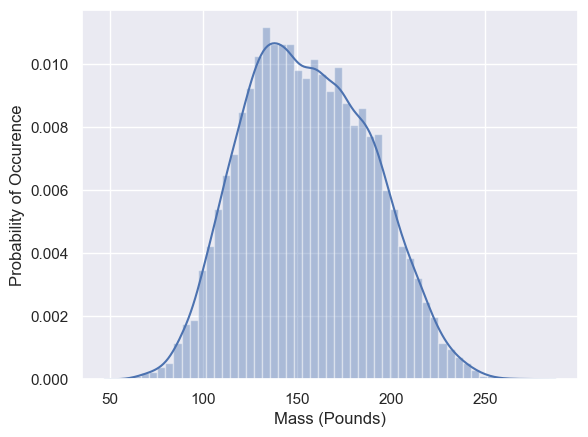

In [160]:
sns.distplot(df_mass['people_mass'])
plt.ylabel('Probability of Occurence')
plt.xlabel('Mass (Pounds)')
plt.show()

In [161]:
# mean
population_mean = df_mass['people_mass'].mean()
population_mean

155.46052284001945

In [162]:
# stardard deviation
population_std = df_mass['people_mass'].std(ddof=1)
population_std

33.58731140716416

Ambil 250 sampel masing-masing sebanyak 30 orang per sampel

In [163]:
n = 30
sample_means=[]
for sample in range(0,250):
    sample_values =df_mass['people_mass'].sample(n)
    sample_mean = sample_values.mean()
    sample_means.append(sample_mean)

<AxesSubplot:ylabel='Density'>

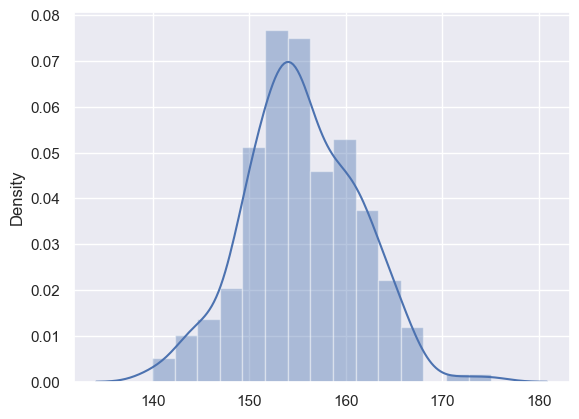

In [164]:
sns.distplot(sample_means)

In [165]:
df_mass['people_mass'].sample(10)

11392    144.700369
11566    134.501515
7035     160.365770
301      156.445725
9170     130.074014
11711     98.179768
9074     121.914290
5046     179.434932
925      174.612841
11269    116.112881
Name: people_mass, dtype: float64

In [166]:
mean_of_sample_means = np.mean(sample_means)
median_of_sample_means = np.median(sample_means)
mean_of_sample_means, median_of_sample_means

(155.43206770436106, 154.90273783562975)

In [167]:
population_mean

155.46052284001945

In [168]:
std_of_sample_means = np.std(sample_means)
std_of_sample_means

5.798916012769212

### Standard Error

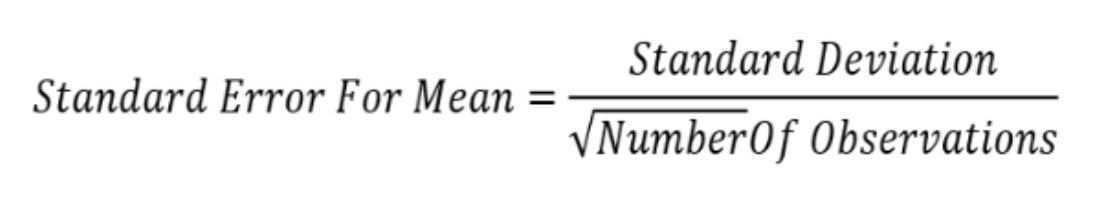

In [169]:
standard_error = population_std/np.sqrt(n)
standard_error

6.132176034551464

In [170]:
std_of_sample_means

5.798916012769212

Kesimpulan: sample memiliki karakteristik yang serupa dengan populasi

## Visualisasikan Area dari Confidence Interval

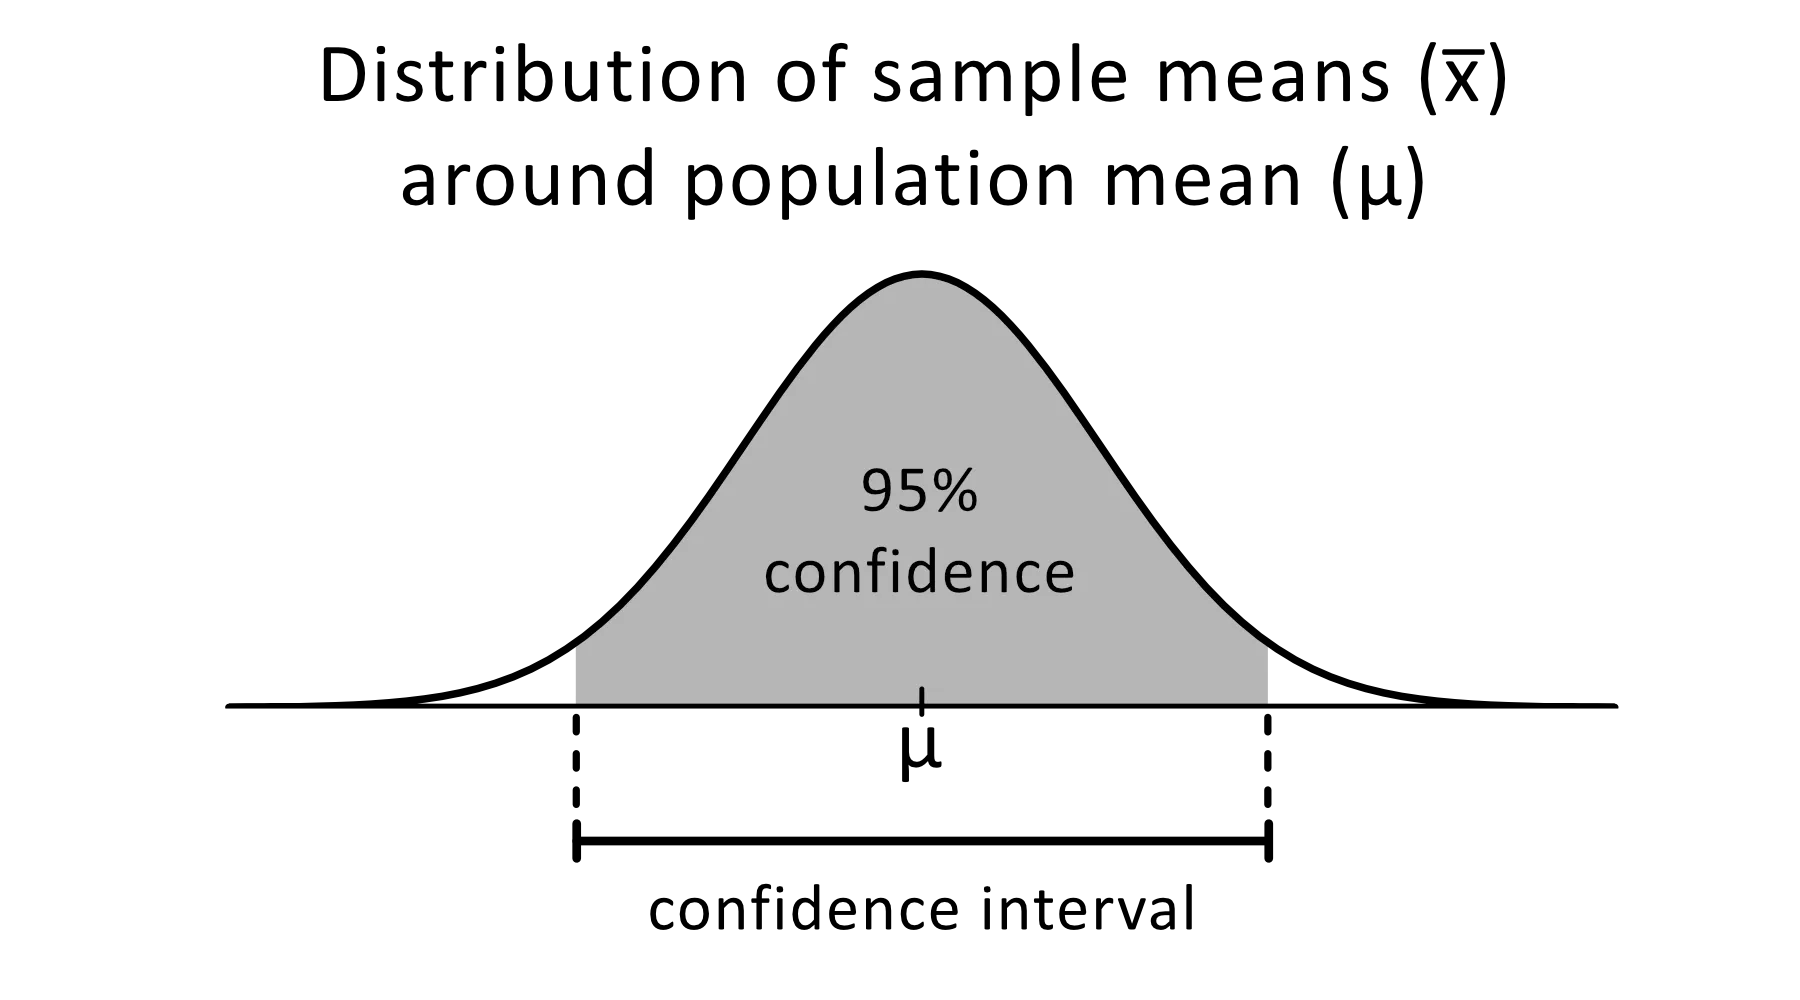

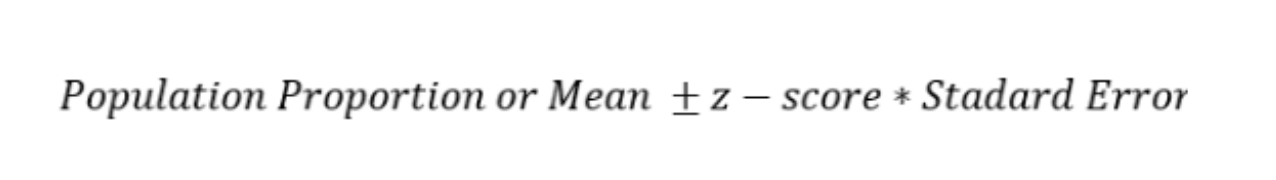

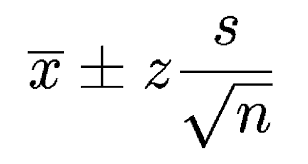

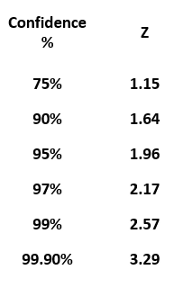

In [171]:
stats.norm.cdf(2.17)

0.9849965770262678

In [172]:
z = 1.96

In [173]:
lower_bound = mean_of_sample_means - z * standard_error
lower_bound

143.4130026766402

In [174]:
upper_bound = mean_of_sample_means + z * standard_error
upper_bound

167.45113273208193

Text(152, 0.01, 'Shaded area are \npart of the \nconfidence intervals \n95%')

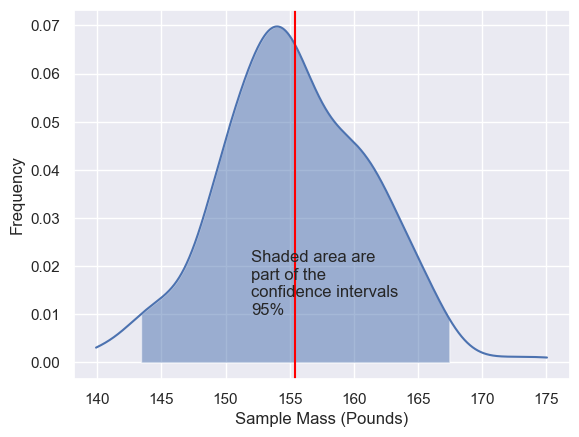

In [175]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means),10000)
plt.plot(pos,kde(pos))
shade = np.linspace(lower_bound,upper_bound,300)
plt.fill_between(shade,kde(shade), alpha=0.5)
plt.xlabel('Sample Mass (Pounds)')
plt.ylabel('Frequency')
plt.axvline(x=mean_of_sample_means,color='red')
plt.text(x=152,y=.01,s='Shaded area are \npart of the \nconfidence intervals \n95%')

## Hypotesis Testing

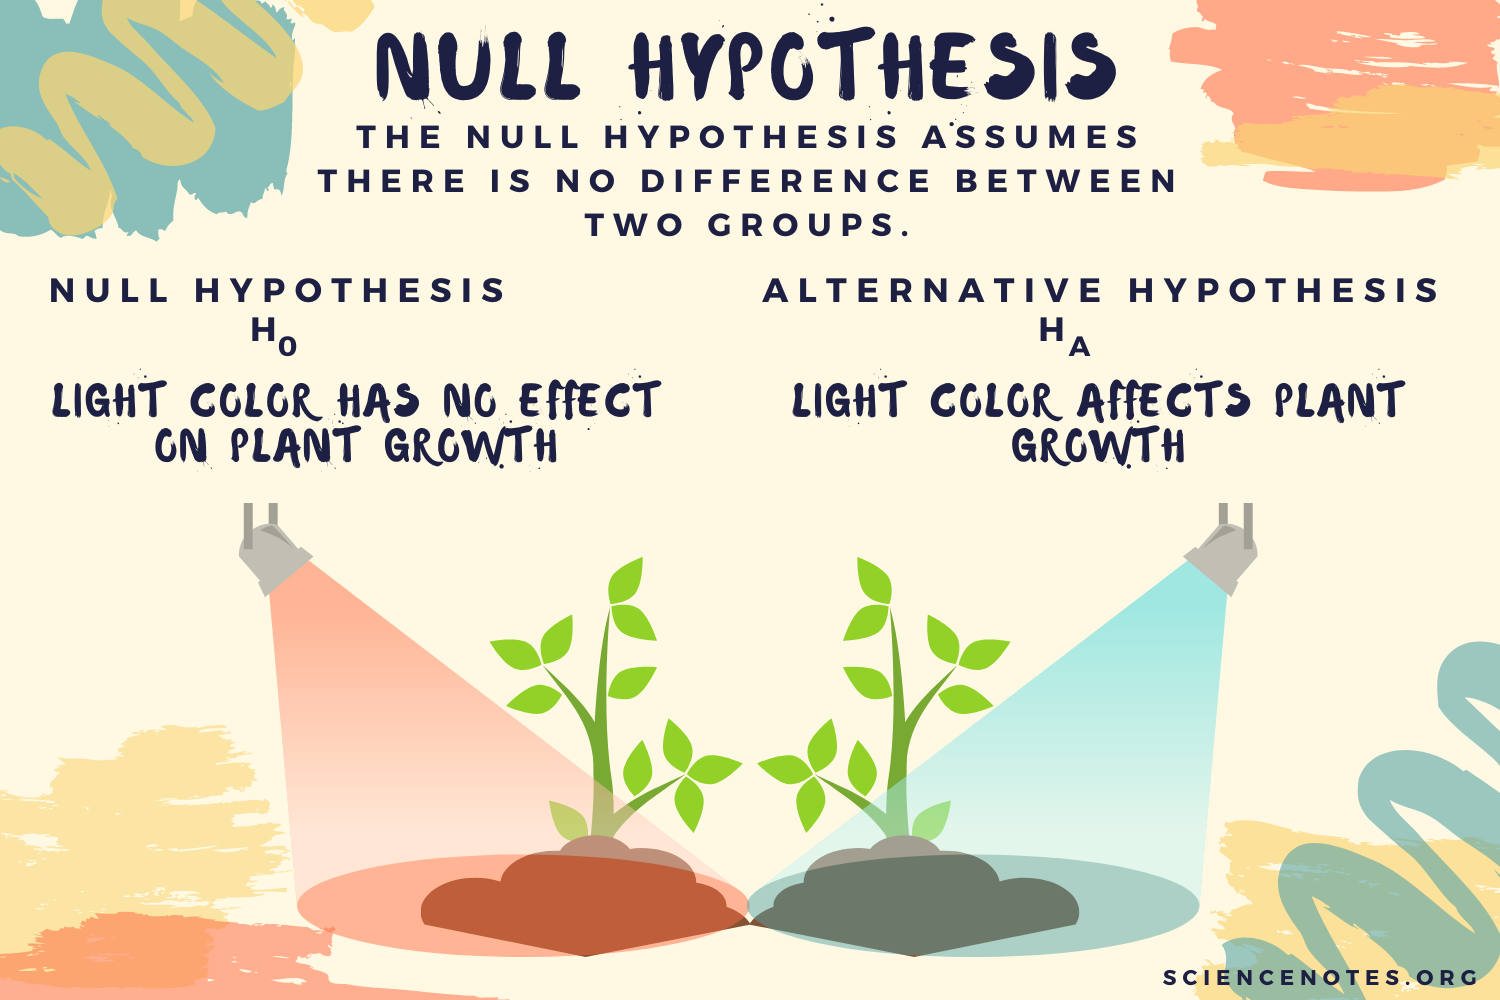

alpha biasanya sama dengan 0.05 karena confidence level 95%

apabila confidence level 95% maka alpha 0.01

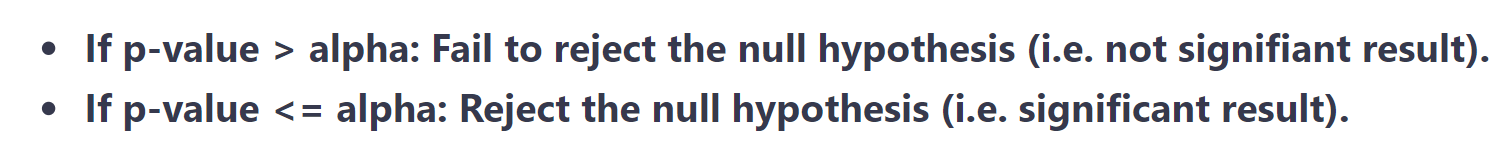

In [176]:
pd.read_csv('heart.csv')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


## Hypothesis Testing in Population Means

In [177]:
df = pd.read_csv('nhanes.csv')
df

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


Uji apakah rata-rata BMI dari laki-laki lebih tinggi daripada BMI perempuan

h0 = rata2 BMI laki-laki tidak lebih tinggi signifikan dari perempuan

h1 = rata2 BMI laki-laki lebih tinggi signifikan dari perempuan

h0 : meanL <= meanP

h1: meanL > meanP

RIAGENDR female = 1 Male = 1

In [178]:
df.RIAGENDR

0       1
1       1
2       1
3       2
4       2
       ..
5730    2
5731    1
5732    2
5733    1
5734    2
Name: RIAGENDR, Length: 5735, dtype: int64

In [179]:
females = df[df.RIAGENDR==2]
males = df[df.RIAGENDR==1]

In [180]:
# jumlah data, mean, stdeviasi
n_females = len(females)
mean_females = females['BMXBMI'].mean()
std_females = females['BMXBMI'].std()
print(n_females,mean_females,std_females)

2976 29.939945652173996 7.75331880954568


In [181]:
# jumlah data, mean, stdeviasi
n_males = len(males)
mean_males = males['BMXBMI'].mean()
std_males = males['BMXBMI'].std()
print(n_males,mean_males,std_males)

2759 28.778072111846985 6.252567616801485


In [182]:
females.BMXBMI.isna().sum()

32

h0 : meanL <= meanP

h1: meanL > meanP

In [183]:
import statsmodels.api as sm

In [184]:
# karena confidence level 95% maka alpha=0.05
alpha = 0.05

In [185]:
bmi_hypo = sm.stats.ztest(males['BMXBMI'].dropna(),females['BMXBMI'].dropna(),alternative='larger')
bmi_hypo

(-6.1755933531383205, 0.9999999996704227)

In [186]:
if bmi_hypo[1]>alpha:
    print('Accept Null Hypothesis (h0) Mean of Males BMI is not Larger than Females')
else:
    print('Reject Null Hypothesis (h0) Mean of Males BMI is not Larger than Females')

Accept Null Hypothesis (h0) Mean of Males BMI is not Larger than Females


## Data sama hipotesis berbeda

Uji apakah mean BMI laki-laki tidak sama dengan mean BMI perempuan

h0 : meanL = meanP

h1: meanL != meanP

In [187]:
bmi_hypo_2s = sm.stats.ztest(males['BMXBMI'].dropna(),females['BMXBMI'].dropna(),alternative='two-sided')
bmi_hypo_2s

(-6.1755933531383205, 6.591544431126401e-10)

In [188]:
if bmi_hypo_2s[1]>alpha:
    print('Accept Null Hypothesis (h0) Mean of Males BMI is not Larger than Females')
else:
    print('Reject Null Hypothesis (h0) Mean of Males BMI is not Larger than Females')

Reject Null Hypothesis (h0) Mean of Males BMI is not Larger than Females


## Hypothesis Testing Population Proportion

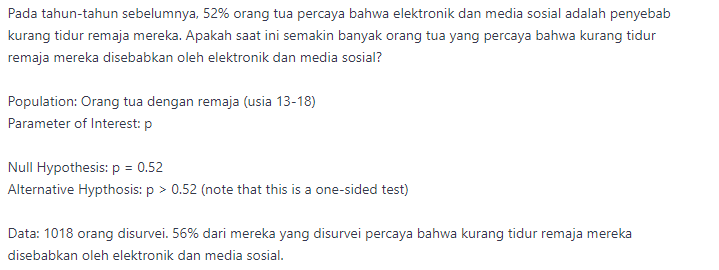

In [189]:
n = 1018
pro_null = 0.52
pro_alt = 0.56

In [190]:
pro_hypo = sm.stats.proportions_ztest(n*pro_alt,n,pro_null,alternative='larger')
pro_hypo

(2.571067795759113, 0.005069273865860533)

In [191]:
if pro_hypo[1]>alpha:
    print('Accept Null Hypothesis (h0)')
else:
    print('Reject Null Hypothesis (h0)')

Reject Null Hypothesis (h0)
